# 第三节： 复杂坐标轴

很多情况下，论文中的图表并不一直是线性坐标系的单轴图，还需要掌握一些复杂坐标轴的绘制方法。比如对数、对数-对数坐标轴、多Y轴、图中图、子图

In [77]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体

## 3.1 坐标轴尺度

展示两个函数的对数坐标轴曲线：

(1) $y=log_{10}^t$

(2) $y=10^{t}$

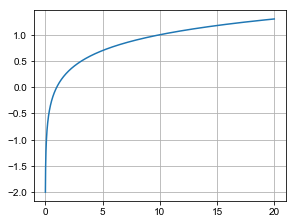

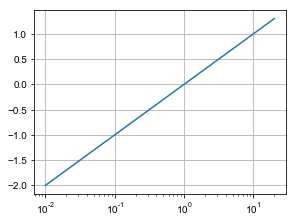

In [78]:
dt = 0.01
t = np.arange(dt, 20.0, dt)
y=np.log10(t)

# 线性坐标轴
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.plot(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/plot_logt.pdf')

# x轴为对数
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.semilogx(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/semilogx.pdf')

plt.show()

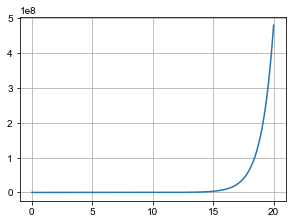

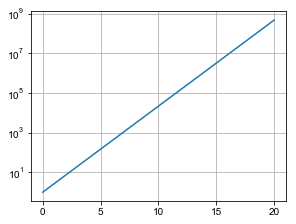

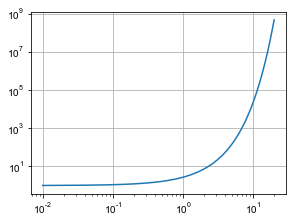

In [3]:
dt = 0.01
t = np.arange(dt, 20.0, dt)
y=np.exp(t)

# 线性坐标轴
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax=plt.gca()
ax.plot(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/plot_10t.pdf')

# x轴为对数
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.semilogy(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/semilogy.pdf')

# x，y轴均为对数
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.loglog(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/loglog.pdf')

plt.show()

## 3.2 多纵轴
相同自变量(x)对应多个因变量(y1,y2,y2, ...)的情况，这些因变量表示不同的物理量，从而其变化范围也是不同的甚至是不同数量级的

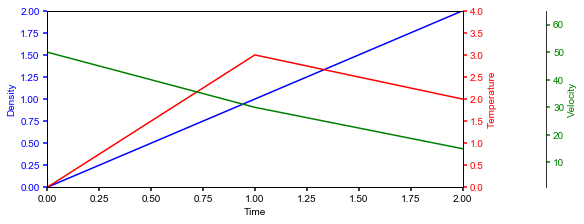

In [83]:
plt.figure(figsize=(8,3), constrained_layout='True')
ax=plt.gca()

par1 = ax.twinx()
par2 = ax.twinx()

# 设置第二个附加Y轴的偏移距离为x轴1.2倍的位置
par2.spines["right"].set_position(("axes", 1.2))
# 绘制每个物理量对应的曲线
p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")
# 设置每个物理量对应的y轴的范围
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)
# 设置每个物理量对应y轴的label
ax.set_xlabel("Time")
ax.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")
# 设置每个y轴的颜色与对应的曲线颜色一致
ax.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# 设置坐标轴属性，可以使用字典批量设置
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

# save fig
plt.savefig('../../figures/Chapter1/multiY.pdf')
plt.show()

## 3.3 图中图

### 3.3.1 方式一

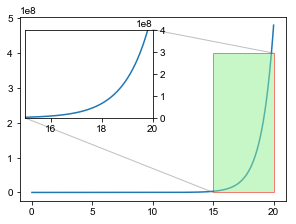

In [88]:
dt = 0.01
t = np.arange(dt, 20.0, dt)
y=np.exp(t)

# 主图
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.plot(t,y)
# 图中图
axin=ax.inset_axes([0.02,0.45,0.48,0.48])
# axin.xaxis.set_ticks([])
# axin.yaxis.set_ticks([])
axin.yaxis.set_ticks_position('right')
axin.plot(t,y)
axin.set_xlim(15,20)
axin.set_ylim(0,4E8)
ax.indicate_inset_zoom(axin,fc='lightgreen',alpha=0.5,ec='red')  #添加一个指示框
# save fig
plt.savefig('../../figures/Chapter1/inset1_indicate.pdf')

plt.show()

### 3.3.2 方式二

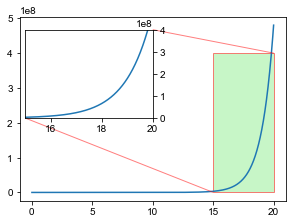

In [96]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset

dt = 0.01
t = np.arange(dt, 20.0, dt)
y=np.exp(t)

# 主图
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.plot(t,y)
# 图中图
axin = inset_axes(ax,
                 width="100%",  
                 height="100%", 
                 bbox_to_anchor=(0.02,0.45,0.48,0.48),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
# axin.xaxis.set_ticks([])
# axin.yaxis.set_ticks([])
axin.yaxis.set_ticks_position('right')
axin.plot(t,y)
axin.set_xlim(15,20)
axin.set_ylim(0,4E8)
# ax.indicate_inset_zoom(axin)  #添加一个指示框
mark_inset(ax, axin, loc1=1, loc2=3, fc="lightgreen", ec='red',alpha=0.5)
# save fig
plt.savefig('../../figures/Chapter1/inset2.pdf')

plt.show()


### 3.3.3 方式三

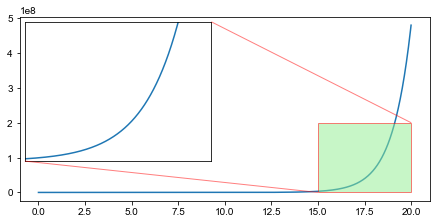

In [100]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

dt = 0.01
t = np.arange(dt, 20.0, dt)
y=np.exp(t)

# 主图
plt.figure(figsize=(6,3), constrained_layout='True')
ax=plt.gca()
ax.plot(t,y)
# 图中图
axin=zoomed_inset_axes(ax, zoom=2, loc='upper left')
axin.xaxis.set_ticks([])
axin.yaxis.set_ticks([])
# axin.yaxis.set_ticks_position('right')
axin.plot(t,y)
axin.set_xlim(15,20)
axin.set_ylim(0,2E8)
# ax.indicate_inset_zoom(axin)  #添加一个指示框
mark_inset(ax, axin, loc1=1, loc2=3, fc="lightgreen", ec='red',zorder=3,alpha=0.5)
# save fig
plt.savefig('../../figures/Chapter1/inset_zoom.pdf')

plt.show()

## 3.4 子图

### 3.4.1 方式一

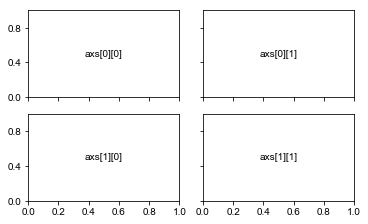

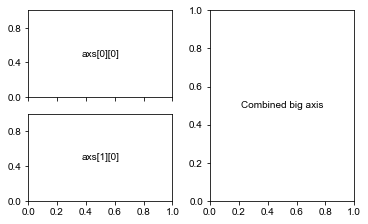

In [106]:
from matplotlib.ticker import MultipleLocator
# 1. 创建多行多列子图阵列
fig,axs=plt.subplots(2,2,sharex=True,sharey=True,constrained_layout=True,figsize=(5,3),
                     gridspec_kw={"width_ratios":[1,1],"height_ratios":[1,1],"hspace":0.1,"wspace":0.15}
                    )
for i in range(0,2):
    for j in range(0,2):
        axs[i][j].text(0.5,0.5,'axs['+str(i)+']'+'['+str(j)+']',va='center',ha='center')
        axs[i][j].xaxis.set_major_locator(MultipleLocator(0.2))
        axs[i][j].yaxis.set_major_locator(MultipleLocator(0.4))
# save fig
plt.savefig('../../figures/Chapter1/subplots1.pdf')

# 2. 多个子图合并为一个子图
fig,axs=plt.subplots(2,2,sharex=True,sharey=True,gridspec_kw={"width_ratios":[1,1],"height_ratios":[1,1]},
                         figsize=(5,3),constrained_layout=True)
for i in range(0,2):
    for j in range(0,2):
        axs[i][j].text(0.5,0.5,'axs['+str(i)+']'+'['+str(j)+']',va='center',ha='center')
        axs[i][j].xaxis.set_major_locator(MultipleLocator(0.2))
        axs[i][j].yaxis.set_major_locator(MultipleLocator(0.4))
# 获取子图网格
gs=axs[0][0].get_gridspec()
# 在子图网格范围内新建子图，比如第二列
axbig = fig.add_subplot(gs[:, 1])
axbig.xaxis.set_major_locator(MultipleLocator(0.2))
axbig.yaxis.set_major_locator(MultipleLocator(0.2))
axbig.text(0.5,0.5,'Combined big axis',va='center',ha='center')
# 删除不用的坐标轴
axs[0][1].remove()
axs[1][1].remove()

# save fig
plt.savefig('../../figures/Chapter1/subplots1_combine.pdf')

### 3.4.2 方式二:

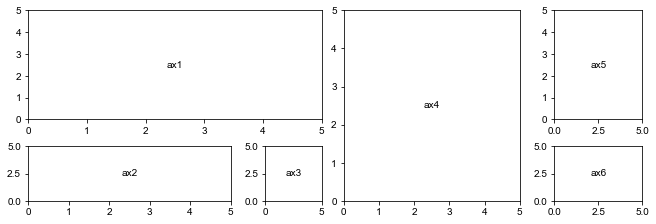

In [109]:
import matplotlib.gridspec as gridspec
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(2.5, 2.5, "ax%d" % (i+1), va="center", ha="center")
        #ax.tick_params(labelbottom=False, labelleft=False)
        ax.set_xlim(0,5)
        ax.set_ylim(0,5)
        
fig = plt.figure(figsize=(9,3),constrained_layout=True)
# 1. 创建第一级网格
gs0 = gridspec.GridSpec(1, 2, figure=fig)
# 2 对第一级网格中某些单元再划分，形成二级网格
gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[0])
# 2.1 创建子图
ax1 = fig.add_subplot(gs00[:-1, :])
ax2 = fig.add_subplot(gs00[-1, :-1])
ax3 = fig.add_subplot(gs00[-1, -1])
# 3. 对以及网格某些单元再划分,
gs01 = gs0[1].subgridspec(3, 3) #与gridspec.GridSpecFromSubplotSpec效果相同
# 3.1 创建子图
ax4 = fig.add_subplot(gs01[:, :-1])
ax5 = fig.add_subplot(gs01[:-1, -1])
ax6 = fig.add_subplot(gs01[-1, -1])
# 对每个子图坐标轴进行设置
format_axes(fig)
# save fig
plt.savefig('../../figures/Chapter1/subplots2.pdf',facecolor='lightblue')